<a href="https://colab.research.google.com/github/shahs3588/ML_with_Streamlit/blob/main/learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing All Required Liberaries for data visulizatoin and ML.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

### Download data fram of titanic using belwo ULR and pandas function, also remove sruvive column using panda pop function from both training and evaluation data sets.

In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [4]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
print(dftrain.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [6]:
print(dfeval.head())

      sex   age  n_siblings_spouses  parch     fare   class     deck  \
0    male  35.0                   0      0   8.0500   Third  unknown   
1    male  54.0                   0      0  51.8625   First        E   
2  female  58.0                   0      0  26.5500   First        C   
3  female  55.0                   0      0  16.0000  Second  unknown   
4    male  34.0                   0      0  13.0000  Second        D   

   embark_town alone  
0  Southampton     y  
1  Southampton     y  
2  Southampton     y  
3  Southampton     y  
4  Southampton     y  


In [7]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [8]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [10]:
dftrain.shape

(627, 9)

In [11]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [12]:
y_train.shape

(627,)

In [13]:
y_train.describe()

count    627.000000
mean       0.387560
std        0.487582
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

### Lets create some graphs of data as visual are important.

<Axes: >

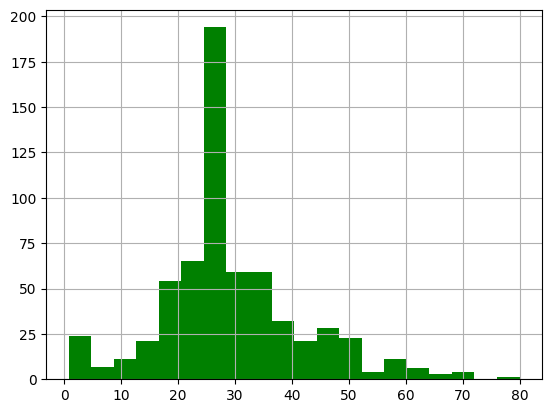

In [17]:
dftrain.age.hist(bins=20, color='green')

<Axes: >

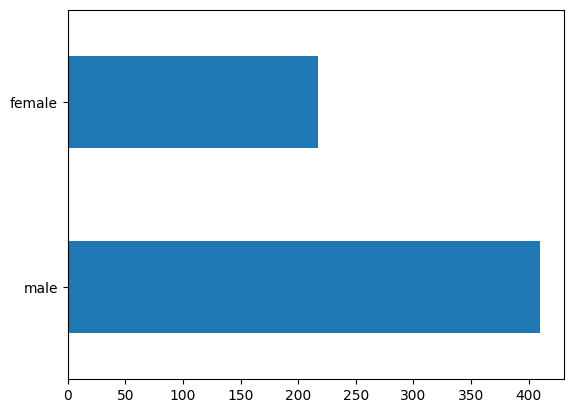

In [15]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

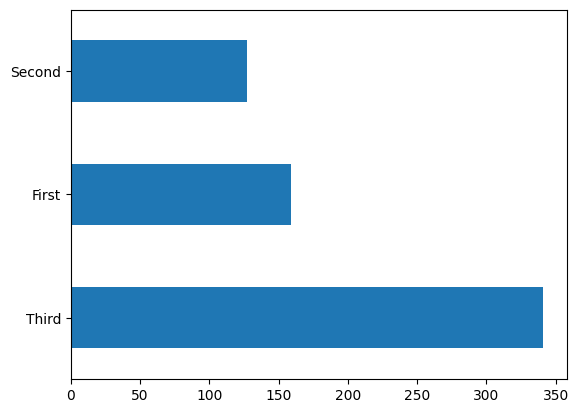

In [31]:
dftrain['class'].value_counts().plot(kind='barh')


Text(0.5, 0, '% survive')

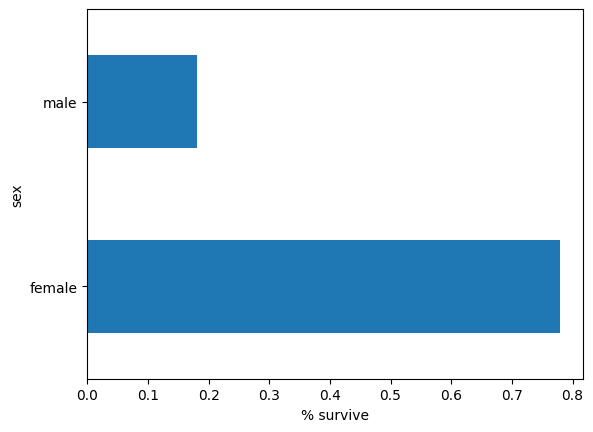

In [35]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')


### After analyzing this information we should notic the following:
1- The majority of passengers are in their 20's or 30's
2- The majority of passengers are male
3- The majority of passengers are in "Third" class.
4- Females have a much higher chance of sruvival.



### Training and testing data:
you may noticed that we loaded two different datasets this is because we train models we need two sets of data: "Training" and "testing"
the training data is what we feed to the model so that it can develop and learn, it is usually much larg size than testing data.
the testing data is what we use to test and evaluate the performance of model. we must use a seperate set of data that the model has not been trained on to evaluate the model. Can you think of why this is?
well the point of our model is to be able to make predictions on NEW data, data that we have never seen before. if we simply test the model on the data that it already seen we cannot measure its accuracy accuratl. we can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and traing data to be seperate.
### Feature Colums.
in our dataset we have two different kinds of informaing:"Categorical and Numeric".
our categorical data is anytink that is not numeric! For example, the sex coliumn does not use numbers, it usese the male and female.




In [36]:
dfeval.shape

(264, 9)

### The Training Process:
so we are almost done the preparing our dataset and I feel as though its good time to explain how our model is trained. Specifically how input data is fed to our model.
For this specific model data is going to be streamed into it in small batches of 32. This mean we will not feed the entire dataset to our model at once, but simply batches of entries.We will actually feed these batches to our model multiple times according to the number of epoch.
An epoch is simply one stream of our entire dataset.the number of epoch we define is the amount of time our model see the entire dataset. we use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.
Ex. if we have 10 epochs, our model will see the same dataset 10 time.
since we need to feed our data in batches and multiple times we need to create somethin called an input function. the input function simply defines how our dataset will be converted into batches at each epoch.

### input Function:
The tensoFlow model we are going to use requires that the data we pass it to comes in as a tf.data.Dataset object. This means we must create an input function that can convert our current pandas data frame into that object.

#### Creating the Model:
we are going to use a linear estimator to utilize the linear regression algorithm.
Creating one is actually prettyu easy! Have a look below:


In [18]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town",
                       "alone"]

NUMERIC_CLOUMNS = ["age", "fare"]

feature_columns =[]
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_CLOUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)



Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [19]:
# input function
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)




### Creating the Model:
now we are going to use a linear estimator to utilize the linear regression algorithm.


In [20]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# we create a linear estimator by passing the feature columns we created earlier.

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


### Training the Model:
Training the model is as easy as passing the input functions that we created earlier.

In [21]:
linear_est.train(train_input_fn)  # Train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on testing data.
#clear_output()
print(result['accuracy'])  # the result variable is simply a dict of stats about our model.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


0.7348485


### Printing the resuld using linear_est model and eval_input_fn that are created above.

In [24]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[5])
print(result[5]['probabilities'][1])

sex                       female
age                         15.0
n_siblings_spouses             0
parch                          0
fare                      8.0292
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 5, dtype: object
0.8019559
